In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('911.csv')

In [3]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


To find out which ZIP Code and township made the most 911 calls

In [4]:
data['zip'].value_counts(ascending=False).head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [5]:
data['twp'].value_counts(ascending=False).head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

The number of emergencies in each category, i.e EMS, Fire reason or Traffic can be found out by taking in the first part of the column 'Title' and plotting the same

In [6]:
data['Reason']=data['title'].apply(lambda title: title.split(':')[0])

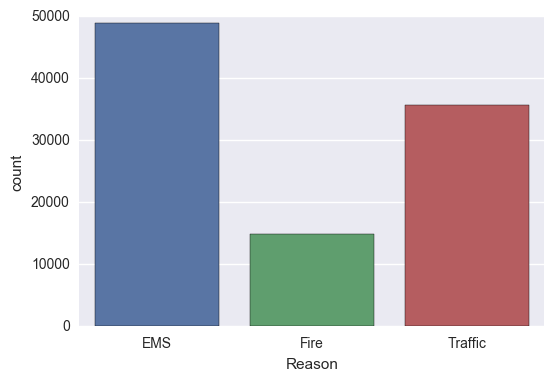

In [7]:
sns.countplot(x='Reason',data=data)

It can be seen that EMS recorded for almost 5000 emergency calls.

To analyze the data according to the day of the week, hour and month, it first has to be converted into datetime object

In [8]:
data['timeStamp']=pd.to_datetime(data['timeStamp'])

Now, sorting the data according to hour, day of the week and month

In [9]:
data['Hour'] = data['timeStamp'].apply(lambda time: time.hour)
data['Day of the week'] = data['timeStamp'].apply(lambda time: time.dayofweek)
data['Month'] = data['timeStamp'].apply(lambda time: time.month)

In [10]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of the week,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,3,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,3,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,3,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,3,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,3,12


In [11]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [12]:
data['Day of the week'] = data['Day of the week'].map(dmap)

Now, the data is ready for visualizaion

Visualizing the 3 different types of 911 calls by day of the week, month and hour of the day :

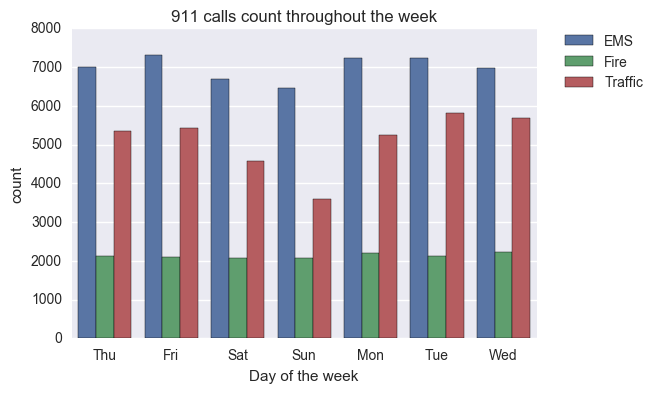

In [13]:
sns.countplot(x='Day of the week',hue='Reason',data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('911 calls count throughout the week')

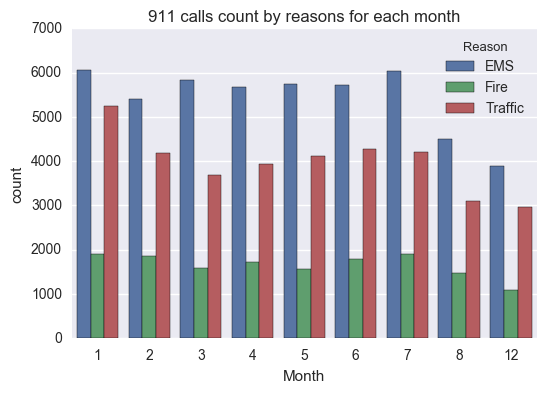

In [14]:
sns.countplot(x='Month',data=data,hue='Reason')
plt.title('911 calls count by reasons for each month')

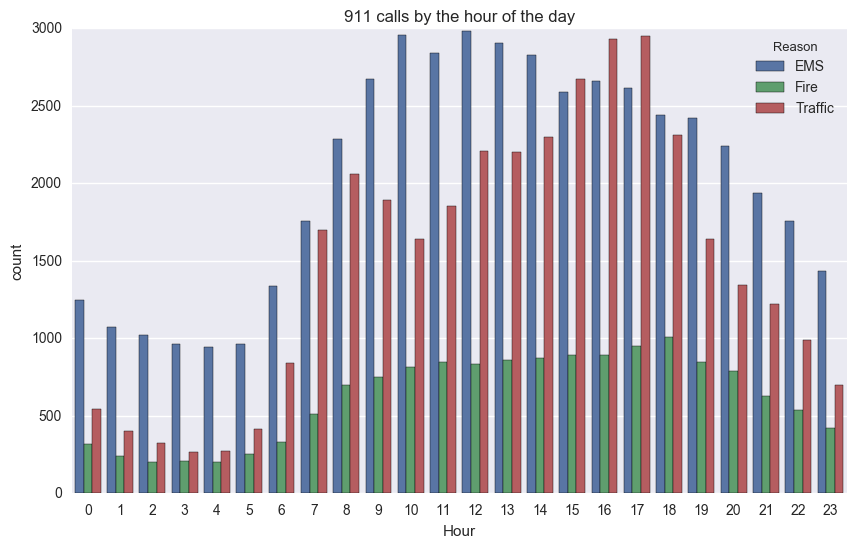

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x='Hour',data=data,hue='Reason')
plt.title('911 calls by the hour of the day')

It can be seen that most emergencies takes place during 10 am - 6 pm.
To find how the number of 911 calls varies each month :

In [16]:
data['Date']=data['timeStamp'].apply(lambda t: t.date())

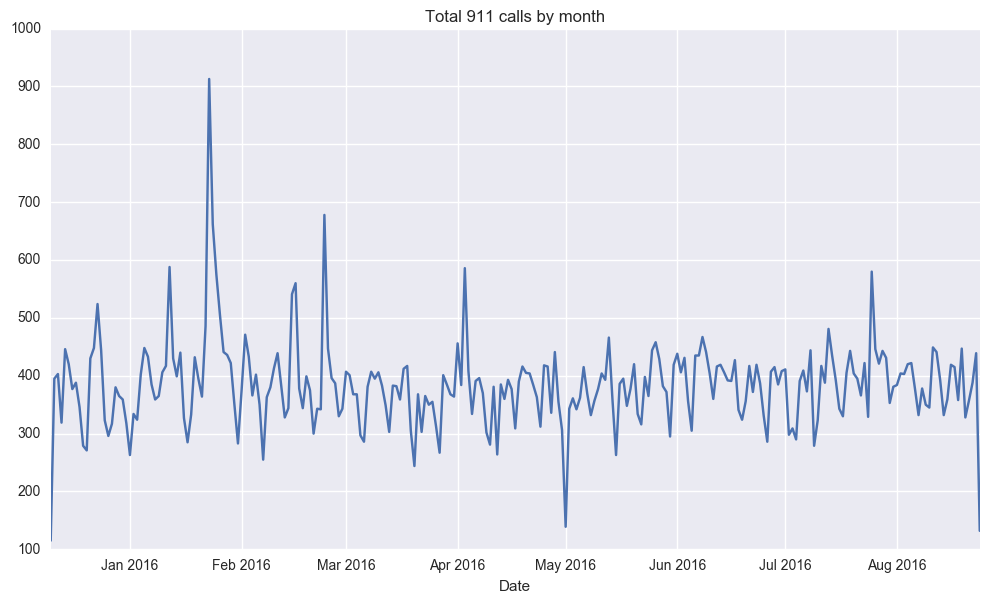

In [23]:
data.groupby('Date').count()['twp'].plot(figsize=(10,6))
plt.tight_layout()
plt.title('Total 911 calls by month')

It can be seen that the highest number of 911 calls was made between January and February
To get even a better idea, number of calls for each reason ( EMS, Fire and Traffic ) can be plotted against the month

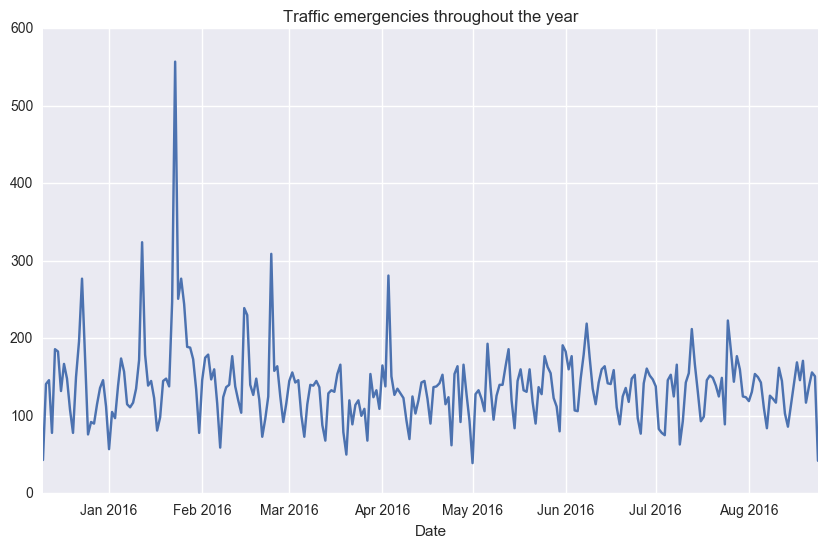

In [18]:
data[data['Reason']=='Traffic'].groupby('Date').count()['twp'].plot(figsize=(10,6))
plt.title('Traffic emergencies throughout the year')

It can be seen that most of the traffic related emergencies took place in the month of February.

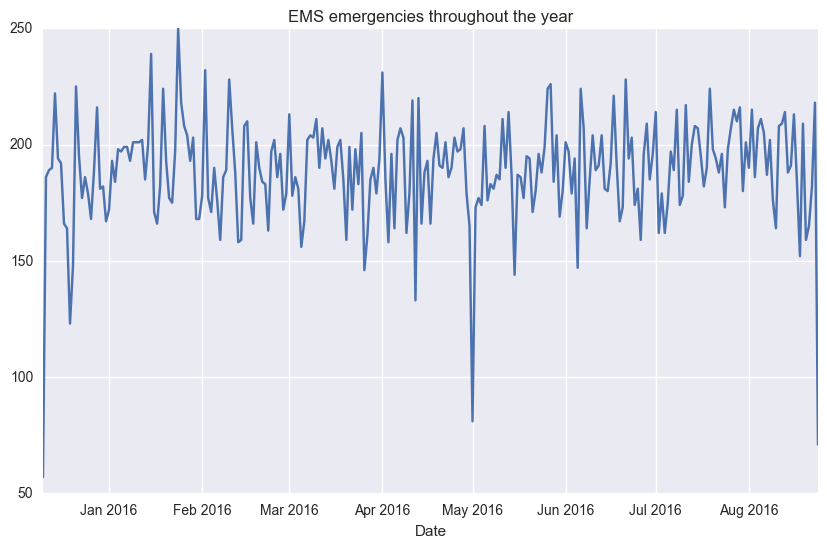

In [19]:
data[data['Reason']=='EMS'].groupby('Date').count()['twp'].plot(figsize=(10,6))
plt.title('EMS emergencies throughout the year')

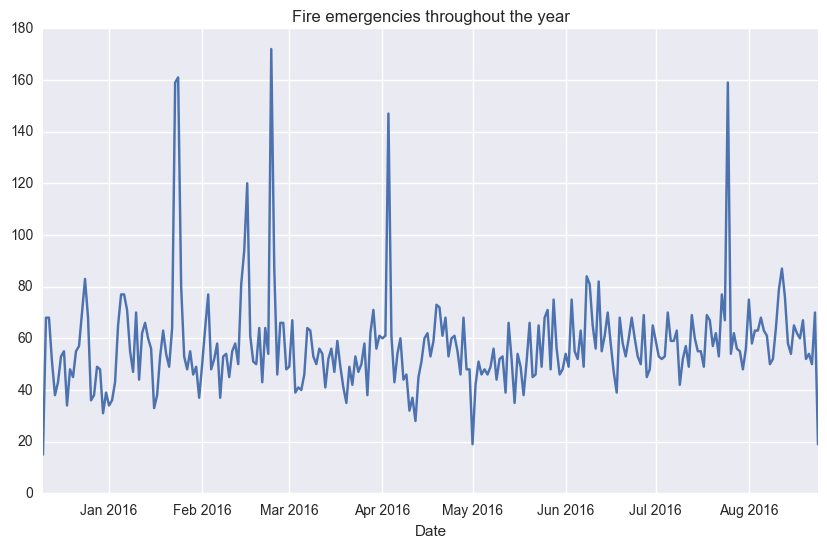

In [20]:
data[data['Reason']=='Fire'].groupby('Date').count()['twp'].plot(figsize=(10,6))
plt.title('Fire emergencies throughout the year')

It can be seen that both Traffic emergencies and EMS has its peak in between the months of January and February. However, the peak emergency period for Fire emergencies was during the end of February

To find how the rate of calls varies every hour every day of the week, the data first needs to be unstacked

In [21]:
dayhour = data.groupby(by=['Day of the week','Hour']).count()['Reason'].unstack()
dayhour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of the week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


The rate of emergencies throughout the day vs the day of the week can be found out using a heatmap

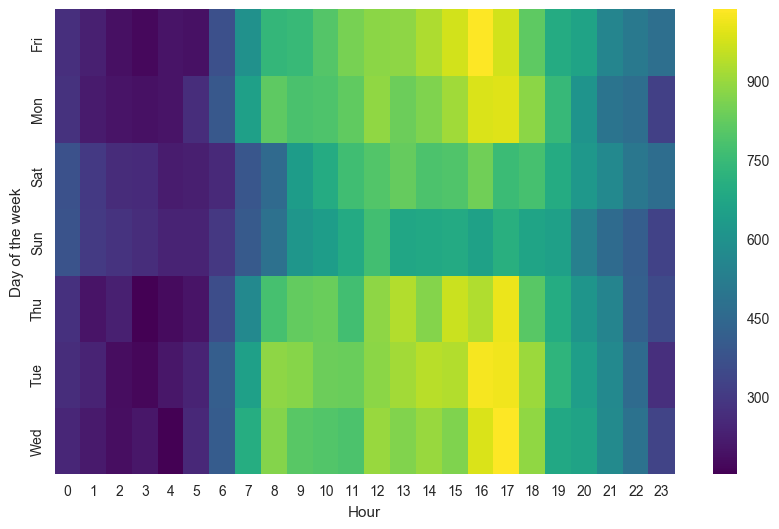

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(data=dayhour,cmap='viridis')